### Tree Based Methods

Preliminary: 
Install graphviz if graphviz have not been installed:
1. To install download exe at https://www2.graphviz.org/Packages/development/windows/10/cmake/Release/x64/

 When installing, select to include PATH for all users.
 
2. At the anaconda prompt type: pip install graphviz

Alternatively you can use Colab, graphviz can easily be installed.

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split, cross_val_score
from io import StringIO  
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report

import pydot ### need to install : conda install pydot
from IPython.display import Image

%matplotlib inline
sns.set_style('white')

In [43]:
df = pd.read_csv('Data/Hitters.csv').dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, 1 to 321
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  263 non-null    object 
 1   AtBat       263 non-null    int64  
 2   Hits        263 non-null    int64  
 3   HmRun       263 non-null    int64  
 4   Runs        263 non-null    int64  
 5   RBI         263 non-null    int64  
 6   Walks       263 non-null    int64  
 7   Years       263 non-null    int64  
 8   CAtBat      263 non-null    int64  
 9   CHits       263 non-null    int64  
 10  CHmRun      263 non-null    int64  
 11  CRuns       263 non-null    int64  
 12  CRBI        263 non-null    int64  
 13  CWalks      263 non-null    int64  
 14  League      263 non-null    object 
 15  Division    263 non-null    object 
 16  PutOuts     263 non-null    int64  
 17  Assists     263 non-null    int64  
 18  Errors      263 non-null    int64  
 19  Salary      263 non-null    float6

### Graph the data

In [44]:
X = df[['Years', 'Hits']].to_numpy()
y = np.log(df.Salary.to_numpy())
df.head()

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N
5,-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,...,501,336,194,A,W,282,421,25,750.0,A


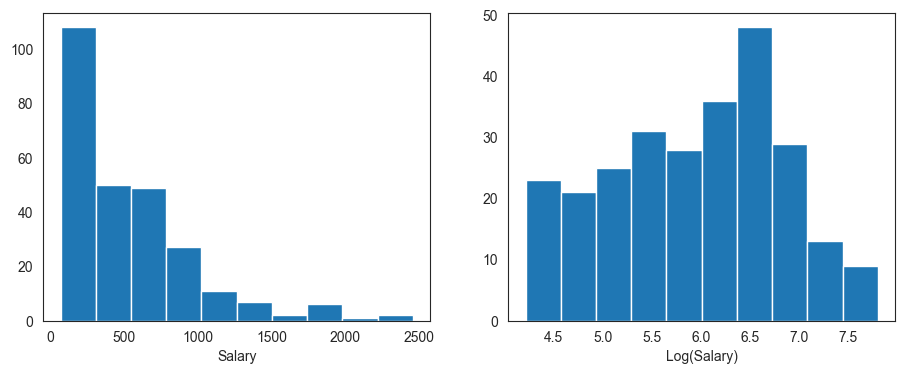

In [45]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(11,4))
ax1.hist(df.Salary.to_numpy())
ax1.set_xlabel('Salary')
ax2.hist(y)
ax2.set_xlabel('Log(Salary)');

### Decision Tree Regression

In [46]:
regr = DecisionTreeRegressor(max_leaf_nodes=3)
regr.fit(X, y)


DecisionTreeRegressor(max_leaf_nodes=3)

### Plot the Tree and graph

[Text(0.4, 0.8333333333333334, 'x[0] <= 4.5\nsquared_error = 0.788\nsamples = 263\nvalue = 5.927'),
 Text(0.2, 0.5, 'squared_error = 0.471\nsamples = 90\nvalue = 5.107'),
 Text(0.6, 0.5, 'x[1] <= 117.5\nsquared_error = 0.42\nsamples = 173\nvalue = 6.354'),
 Text(0.4, 0.16666666666666666, 'squared_error = 0.312\nsamples = 90\nvalue = 5.998'),
 Text(0.8, 0.16666666666666666, 'squared_error = 0.252\nsamples = 83\nvalue = 6.74')]

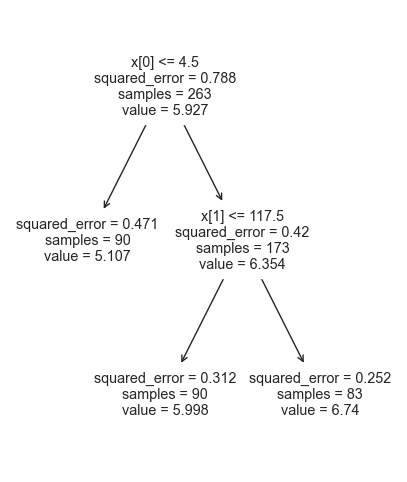

In [47]:
from sklearn import tree
plt.figure(figsize=[5,6]) #control size of figure in inches
tree.plot_tree(regr) 

Text-based tree can also be created ... see below

In [48]:
from sklearn.tree import export_text
r = export_text(regr, feature_names=['years','hits'])
print(r)

|--- years <= 4.50
|   |--- value: [5.11]
|--- years >  4.50
|   |--- hits <= 117.50
|   |   |--- value: [6.00]
|   |--- hits >  117.50
|   |   |--- value: [6.74]



### The following requires Graphviz installed, or you can skip
If you can already draw the decision tree above, skip the following 2 cells, 

In [49]:
import graphviz 
dot_data = tree.export_graphviz(regr, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("sal") 
#generates sal.pdf file

'sal.pdf'

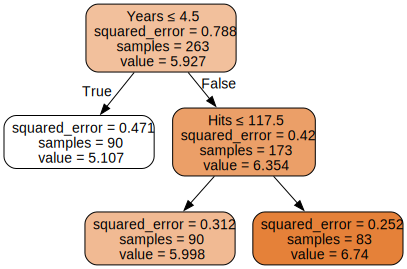

In [50]:
from sklearn import tree
dot_data = tree.export_graphviz(regr, out_file=None,
                      feature_names=['Years','Hits'],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

### Question
1. What does mse, samples, value mean in the decision tree graph printed above?
2. What are the predictors and response variable in this example?

### Answers
1. Explanations:
   1. `mse` **(Mean Squared Error)**:
      1. **Definition**: The mean squared error (MSE) is a measure of the average squared difference between the actual and predicted values. It is used to evaluate the quality of the model's predictions
      2. **Interpretation**: In the decision tree graph, mse represents the mean squared error of the samples at that particular node. A lower mse indicates better predictions at that node. 
   2. `samples`:
      1. **Definition**: The number of samples (data points) that reach a particular node in the decision tree.
      2. **Interpretation**: In the decision tree graph, samples indicates how many data points are present at that node. It helps to understand the distribution of data across the tree.
   3. `value`:
      1. **Definition**: The predicted value at that node, which is the average of the target values of the samples in that node.
      2. **Interpretation**: In the decision tree graph, value represents the predicted value for the target variable at that node. It is the average value of the response variable for the samples in that node.
2. Explanations:
   1. **Predictors (Features)**:
      1. `years`: Represents the number of basketball player's years.
      2. `hits`: Represents the number of basketball player's hits.
   2. **Response Variable**:
      1. Log values of `Salary`

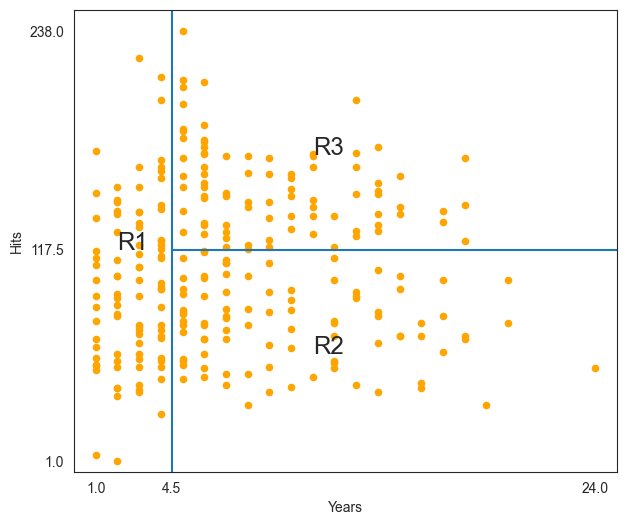

In [51]:
df.plot('Years', 'Hits', kind='scatter', color='orange', figsize=(7,6))
plt.xlim(0,25)
plt.ylim(ymin=-5)
plt.xticks([1, 4.5, 24])
plt.yticks([1, 117.5, 238])
plt.vlines(4.5, ymin=-5, ymax=250)
plt.hlines(117.5, xmin=4.5, xmax=25)
plt.annotate('R1', xy=(2,117.5), fontsize='xx-large')
plt.annotate('R2', xy=(11,60), fontsize='xx-large')
plt.annotate('R3', xy=(11,170), fontsize='xx-large');

Text(0, 0.5, 'y')

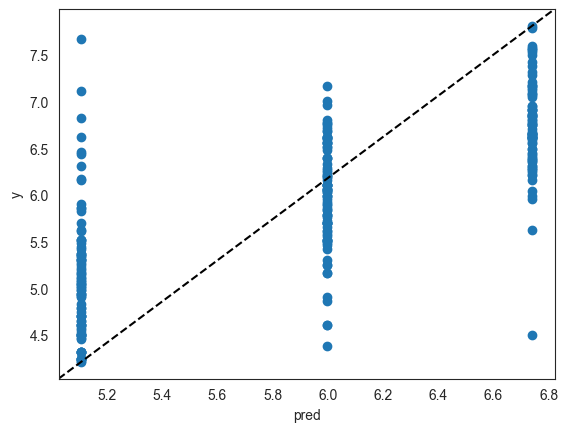

In [52]:
pred = regr.predict(X)
plt.scatter(pred, y, label='Sal')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)#draws the dotted line
plt.xlabel('pred')
plt.ylabel('y')

In [53]:
mean_squared_error(y, pred)

0.3472621585610648

In [54]:
#check invidivual prediction, what are the values used as input and predicted?
prd = regr.predict([[ 14,  81]])
print("Prediction:", np.exp(prd))

Prediction: [402.77570648]


In [55]:
# Show player data where Years = 14 and Hits = 81
df[(df.Years == 14) & (df.Hits == 81)]

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N


In [56]:
prd2 = regr.predict([[ 2,  120]])
print("Prediction:", np.exp(prd2))

Prediction: [165.1393406]


### Question
1. For the above code, what are the values used as input?
2. How accurate is the prediction? What is the actual value?
3. Which player is that?
4. What is the prediction value for play with 2 years experience and 120 hits?

### Answers
1. Input values: `Years = 14` & `Hits = 81`
2. Accuracy:
    - `Prediction value = 402.77570648`;
    - `Actual data = 475`
    - **Accuracy = 84.82%**
3. Player = -Alan Ashby
4. Prediction value for `Years = 2` and `Hits = 120` is **165.1393406**

[Text(0.4, 0.8333333333333334, 'x[0] <= 4.5\nsquared_error = 0.788\nsamples = 263\nvalue = 5.927'),
 Text(0.2, 0.5, 'squared_error = 0.471\nsamples = 90\nvalue = 5.107'),
 Text(0.6, 0.5, 'x[1] <= 117.5\nsquared_error = 0.42\nsamples = 173\nvalue = 6.354'),
 Text(0.4, 0.16666666666666666, 'squared_error = 0.312\nsamples = 90\nvalue = 5.998'),
 Text(0.8, 0.16666666666666666, 'squared_error = 0.252\nsamples = 83\nvalue = 6.74')]

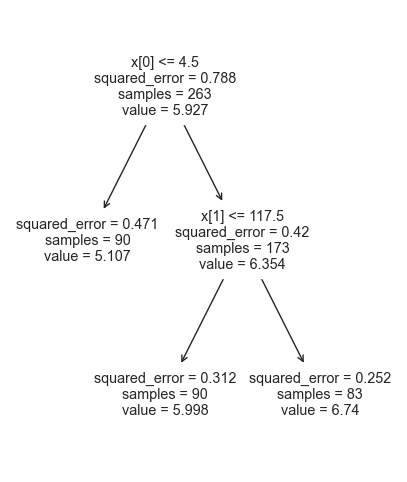

In [57]:
from sklearn import tree
plt.figure(figsize=[5,6]) #control size of figure in inches
tree.plot_tree(regr) 

### Classification Tree 

In [58]:
df2 = pd.read_csv('Data/Heart.csv').drop('Unnamed: 0', axis=1).dropna()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        297 non-null    int64  
 1   Sex        297 non-null    int64  
 2   ChestPain  297 non-null    object 
 3   RestBP     297 non-null    int64  
 4   Chol       297 non-null    int64  
 5   Fbs        297 non-null    int64  
 6   RestECG    297 non-null    int64  
 7   MaxHR      297 non-null    int64  
 8   ExAng      297 non-null    int64  
 9   Oldpeak    297 non-null    float64
 10  Slope      297 non-null    int64  
 11  Ca         297 non-null    float64
 12  Thal       297 non-null    object 
 13  AHD        297 non-null    object 
dtypes: float64(2), int64(9), object(3)
memory usage: 34.8+ KB


In [59]:
df2.ChestPain = pd.factorize(df2.ChestPain)[0]
df2.Thal = pd.factorize(df2.Thal)[0]
X2 = df2.drop('AHD', axis=1)
y2 = pd.factorize(df2.AHD)[0]
X2.head()


,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal
0,63,1,0,145,233,1,2,150,0,2.3,3,0.0,0
1,67,1,1,160,286,0,2,108,1,1.5,2,3.0,1
2,67,1,1,120,229,0,2,129,1,2.6,2,2.0,2
3,37,1,2,130,250,0,0,187,0,3.5,3,0.0,1
4,41,0,3,130,204,0,2,172,0,1.4,1,0.0,1


In [ ]:
clf = DecisionTreeClassifier(max_depth=None, max_leaf_nodes=6, max_features=3)
clf.fit(X2,y2)

# score returns the accuracy of the prediction: the percentage of correct
# classifications if it's a two-class classification problem
clf.score(X2,y2)



0.797979797979798

In [61]:
#print the classification report of the training data (in this case)
y2pred=clf.predict(X2)
print(classification_report(y2, y2pred))

              precision    recall  f1-score   support

           0       0.82      0.79      0.81       160
           1       0.77      0.80      0.79       137

    accuracy                           0.80       297
   macro avg       0.80      0.80      0.80       297
weighted avg       0.80      0.80      0.80       297



In [62]:
#print(confusion_matrix(y2, y2pred))
#fancy way below
cm = pd.DataFrame(confusion_matrix(y2, y2pred).T, index=['No', 'Yes'], columns=['No', 'Yes'])
cm.index.name = 'Predicted'
cm.columns.name = 'True'
cm


True,No,Yes
Predicted,,
No,127,27
Yes,33,110


### Graph Classification tree

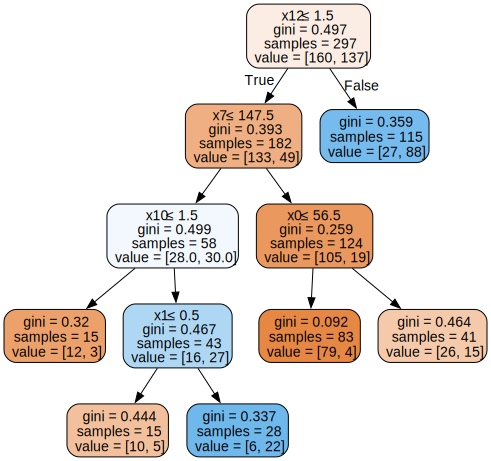

In [63]:
#requires Graphviz
from sklearn import tree
dot_data = tree.export_graphviz(clf, out_file=None,
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

### Question
1. What does samples, value, class means in the decision tree graph printed above?
2. What are the predictors and response variable in this example?

### Answer
1. **Explanations**:
     - `Samples`: The number of data points (samples) that reach a particular node in the decision tree.
     - `Value`: The distribution of the target variable (class labels) among the samples at that node.
     - `Class`: The predicted class label for the samples at that node.
2. From the example above:
     - **Predictors**:
       - Age
       - Sex
       - ChestPain
       - RestBP
       - Chol
       - Fbs
       - RestECG
       - MaxHR
       - ExAng
       - Oldpeak
       - Slope
       - Ca
       - Thal
     - **Response**: AHD


## Question
Create a decision tree regressor for the data Carseats.csv, the data consist of  simulated data set containing sales of child car seats at 400 different stores. You may have to clean up the data abit, and map the 'Yes','No' into 0 and 1. You can use this command, for example:
```
df.Urban = df3.Urban.map({'No':0, 'Yes':1})
```

Separate the data into training and test. You also need to factorize ShelveLoc. 
1. Print out the MSE value for both training and test dataset. 
1. Print out the regression decision tree graph. 
1. Print out also the scatter plot of Y and Predicted Y.


In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import graphviz
from sklearn import tree

# Load the data
df = pd.read_csv('./Data/Carseats.csv')

# Clean the data
df['Urban'] = df['Urban'].map({'No': 0, 'Yes': 1})
df['US'] = df['US'].map({'No': 0, 'Yes': 1})
df['ShelveLoc'] = pd.factorize(df['ShelveLoc'])[0]

# Define the feature matrix (X) and target vector (y)
X = df.drop('Sales', axis=1)
y = df['Sales']

# Load the data
df = pd.read_csv('./Data/Carseats.csv')

# Clean the data
df['Urban'] = df['Urban'].map({'No': 0, 'Yes': 1})
df['US'] = df['US'].map({'No': 0, 'Yes': 1})
df['ShelveLoc'] = pd.factorize(df['ShelveLoc'])[0]

# Define the feature matrix (X) and target vector (y)
X = df.drop('Sales', axis=1)
y = df['Sales']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   400 non-null    int64  
 1   Sales        400 non-null    float64
 2   CompPrice    400 non-null    int64  
 3   Income       400 non-null    int64  
 4   Advertising  400 non-null    int64  
 5   Population   400 non-null    int64  
 6   Price        400 non-null    int64  
 7   ShelveLoc    400 non-null    int64  
 8   Age          400 non-null    int64  
 9   Education    400 non-null    int64  
 10  Urban        400 non-null    int64  
 11  US           400 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 37.6 KB


In [66]:
# Initialize the decision tree regressor
regr = DecisionTreeRegressor(criterion='squared_error', max_depth=None, max_leaf_nodes=6, max_features=3)

# Fit the model using the training data
regr.fit(X_train, y_train)

DecisionTreeRegressor(max_features=3, max_leaf_nodes=6)

In [67]:
# Predict the values for training and test sets
y_train_pred = regr.predict(X_train)
y_test_pred = regr.predict(X_test)

# Calculate the MSE for training and test sets
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Print the MSE values
print(f"MSE for Training Set: {mse_train}")
print(f"MSE for Test Set: {mse_test}")

MSE for Training Set: 5.064208229324848
MSE for Test Set: 8.02014011975


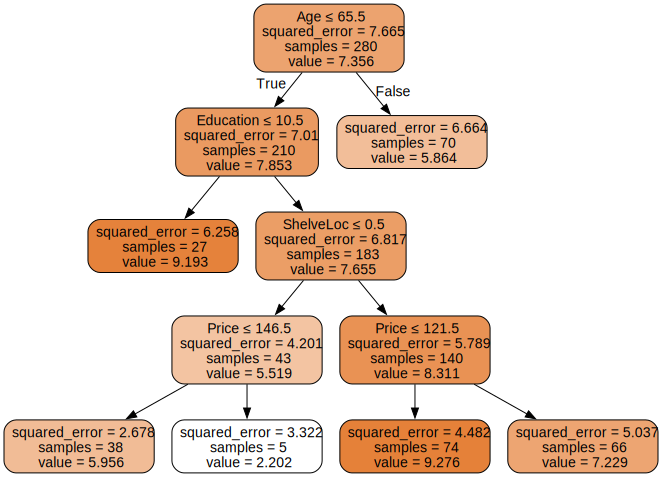

In [68]:
# Export the decision tree to a graphviz format
dot_data = tree.export_graphviz(regr, out_file=None, 
                                feature_names=X.columns, 
                                filled=True, rounded=True, 
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("carseats_decision_tree")  # Save the graph as a file
graph  # Display the graph

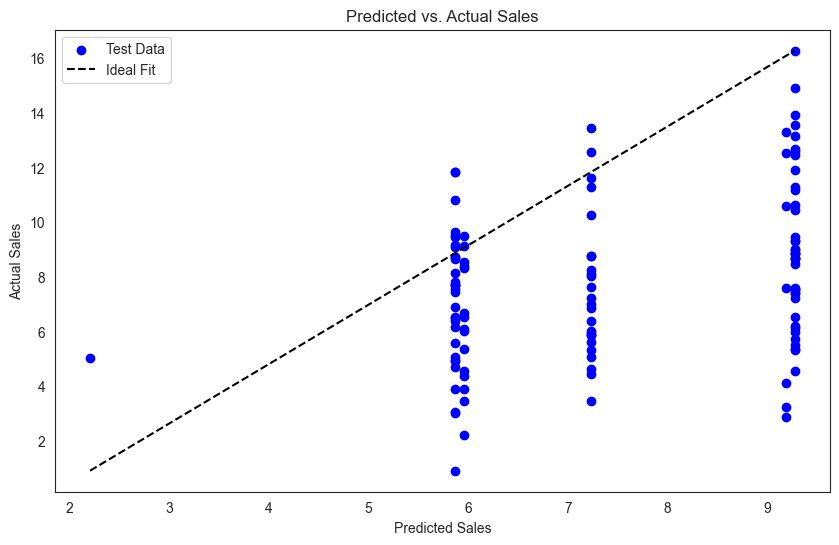

In [69]:
# Scatter plot of predicted vs. actual values for the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test_pred, y_test, label='Test Data', color='blue')
plt.plot([min(y_test_pred), max(y_test_pred)], [min(y_test), max(y_test)], '--k', label='Ideal Fit')
plt.xlabel('Predicted Sales')
plt.ylabel('Actual Sales')
plt.title('Predicted vs. Actual Sales')
plt.legend()
plt.show()

## Question
Using the same Carseats.csv data set, convert the problem into a Classification problem. Create a new column that maps the sales to High the value is greater than 8. You can use this:

```
f3['High'] = df2.Sales.map(lambda x: 1 if x>8 else 0)
```
Map columsn Urban and US into 1 or 0 as well. Create a train and test split on the dataset. Run it through a decision tree classifier.

1. Print the classification report
2. Print confusion matrix
3. Print the decision tree graph

In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import graphviz
from sklearn import tree

# Load the data
df = pd.read_csv('./Data/Carseats.csv')

# Clean the data
df['Urban'] = df['Urban'].map({'No': 0, 'Yes': 1})
df['US'] = df['US'].map({'No': 0, 'Yes': 1})
df['ShelveLoc'] = pd.factorize(df['ShelveLoc'])[0]

# Create a new column 'High' based on Sales
df['High'] = df['Sales'].map(lambda x: 1 if x > 8 else 0)

# Define the feature matrix (X) and target vector (y)
X = df.drop(['Sales', 'High'], axis=1)
y = df['High']

In [71]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [72]:
# Initialize the decision tree classifier
clf = DecisionTreeClassifier(criterion='gini', max_depth=None, max_leaf_nodes=6, max_features=3)

# Fit the model using the training data
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_features=3, max_leaf_nodes=6)

In [73]:
# Predict the values for the test set
y_test_pred = clf.predict(X_test)

# Print the classification report
print("Classification Report for Test Set:")
print(classification_report(y_test, y_test_pred))

# Print the confusion matrix
cm = pd.DataFrame(confusion_matrix(y_test, y_test_pred).T, index=['No', 'Yes'], columns=['No', 'Yes'])
cm.index.name = 'Predicted'
cm.columns.name = 'True'
print(cm)

Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.70      0.58      0.64        65
           1       0.59      0.71      0.64        55

    accuracy                           0.64       120
   macro avg       0.65      0.65      0.64       120
weighted avg       0.65      0.64      0.64       120

True       No  Yes
Predicted         
No         38   16
Yes        27   39


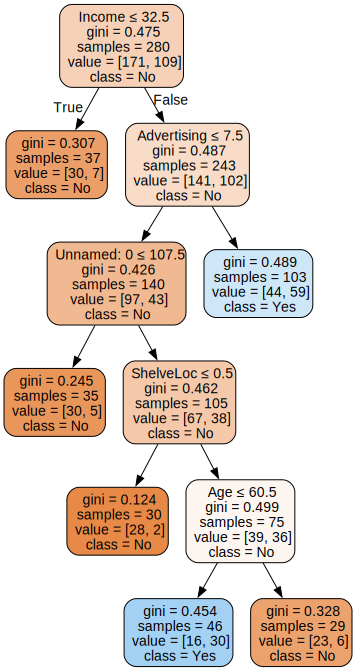

In [74]:
# Export the decision tree to a graphviz format
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=X.columns, 
                                class_names=['No', 'Yes'],
                                filled=True, rounded=True, 
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("carseats_decision_tree_classification")  # Save the graph as a file
graph  # Display the graph

### Random Forest Classifier

Digits Classification demonstration

In [75]:
#source: Jake VanderPlas
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

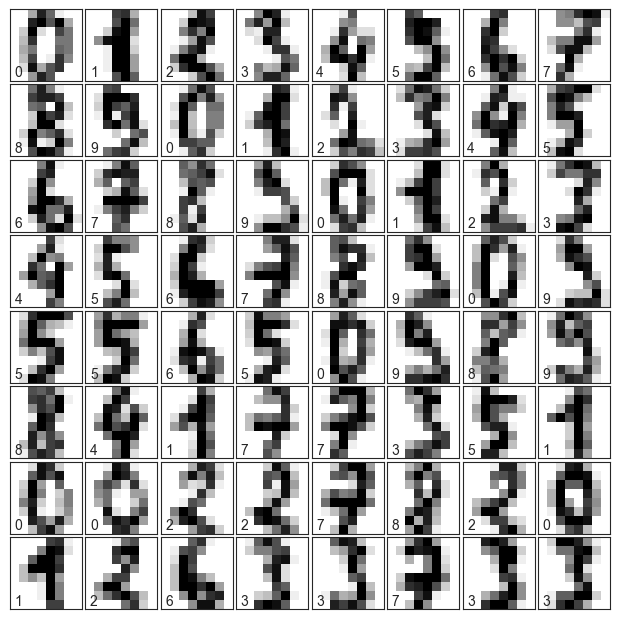

In [76]:
# set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))


In [77]:
from sklearn.model_selection  import train_test_split
from sklearn.ensemble import RandomForestClassifier

Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target,
                                                random_state=0)
model = RandomForestClassifier(n_estimators=1000) # this is the number of trees 
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

In [78]:
from sklearn import metrics
print(metrics.classification_report(ypred, ytest))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       0.98      0.98      0.98        43
           2       0.95      1.00      0.98        42
           3       0.98      0.96      0.97        46
           4       0.97      1.00      0.99        37
           5       0.98      0.96      0.97        49
           6       1.00      1.00      1.00        52
           7       1.00      0.96      0.98        50
           8       0.94      0.98      0.96        46
           9       0.98      0.98      0.98        47

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



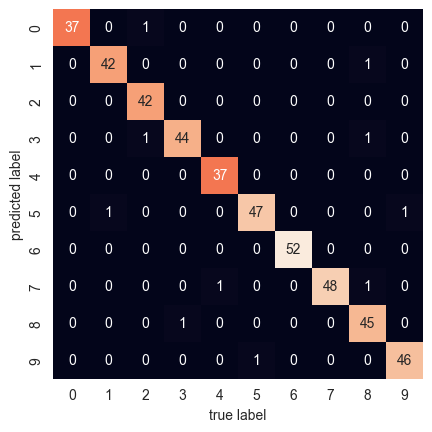

In [79]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

### Question: Test with your own image

Test image should be 8x8 flattened and normalized. (20 marks)

[ 0.  3. 13. 16.  9.  0.  0.  0.  0. 10. 15. 13. 15.  2.  0.  0.  0. 15.
  4.  4. 16.  1.  0.  0.  0.  0.  0.  5. 16.  2.  0.  0.  0.  0.  1. 14.
 13.  0.  0.  0.  0.  0. 10. 16.  5.  0.  0.  0.  0.  4. 16. 13.  8. 10.
  9.  1.  0.  2. 16. 16. 14. 12.  9.  1.]


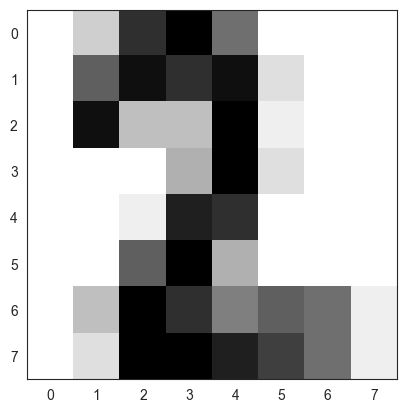

In [80]:
import matplotlib.pyplot as plt
#check the data format
print(Xtrain[0])
i=Xtrain[0].reshape(8,8)
plt.imshow(i,cmap=plt.cm.binary)

In [81]:
%pip install scikit-image

Note: you may need to restart the kernel to use updated packages.


[[ 0.  2. 10. 12. 12.  4.  0.  0.]
 [ 0.  4. 14.  2.  6. 13.  0.  0.]
 [ 0.  0.  0.  0.  1. 13.  1.  0.]
 [ 0.  0.  0.  0.  7. 12.  0.  0.]
 [ 0.  0.  4. 13. 13.  3.  0.  0.]
 [ 0. 11. 13. 11.  1.  0.  0.  0.]
 [ 0.  7. 13. 13.  7.  1.  0.  0.]
 [ 0.  0.  0.  4. 10. 12.  5.  0.]]


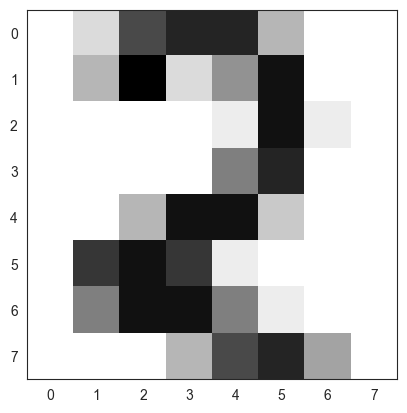

In [82]:
from skimage.io import imread, imshow

import numpy as np

t=imread('data/two.png',as_gray=True)
t=16-np.rint(t*16)
plt.imshow(t,cmap=plt.cm.binary)
print(t)



In [83]:
model.predict(t.reshape(-1,64))

array([2])

[[ 0.  2. 14. 15. 13.  5.  0.  0.]
 [ 0.  4. 13.  6. 13. 14.  4.  0.]
 [ 1. 15. 10.  0.  0. 15.  7.  0.]
 [ 0. 15. 12.  0.  0. 15.  9.  0.]
 [ 0. 15.  7.  0.  0. 12. 11.  0.]
 [ 0. 15.  4.  0.  0. 13. 12.  0.]
 [ 1. 15. 12.  4.  2. 15. 12.  0.]
 [ 0.  4. 12. 15. 11. 10.  4.  0.]]


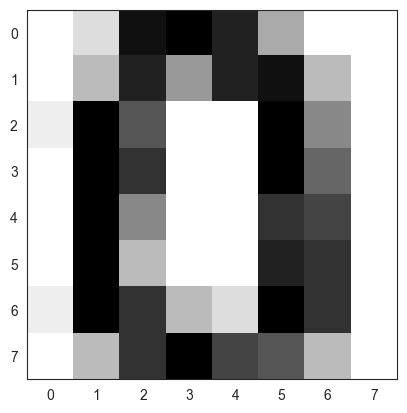

In [84]:
z=imread('data/zero.png',as_gray=True)
z=16-np.rint(z*16)
plt.imshow(z,cmap=plt.cm.binary)
print(z)

In [85]:
model.predict(z.reshape(-1,64))

array([0])